<a href="https://colab.research.google.com/drive/1IFVF-HoYcCPoTOuPMj0rl4A72uOjzsEj?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---

# DESAFIO CIENTISTA DE DADOS
## INDICIUM: LIGHTHOUSE
---
---


###### Autora: Aline de Castro Santos
###### Data: Julho de 2024

# **1. INTRODU√á√ÉO**

## 1.2. Dicion√°rio dos dados

A base de dados de treinamento cont√©m 15 colunas. Seus nomes e descri√ß√£o das colunas s√£o:

- Series_Title ‚Äì Nome do filme
- Released_Year - Ano de lan√ßamento
- ertificate - Classifica√ß√£o et√°ria
- Runtime ‚Äì Tempo de dura√ß√£o
- Genre - G√™nero
- IMDB_Rating - Nota do IMDB
- Overview - Overview do filme
- Meta_score - M√©dia ponderada de todas as cr√≠ticas
- Director ‚Äì Diretor
- Star1 - Ator/atriz #1
- Star2 - Ator/atriz #2
- Star3 - Ator/atriz #3
- Star4 - Ator/atriz #4
- No_of_Votes - N√∫mero de votos
- Gross - Faturamento


# **2. BIBLIOTECAS NECESS√ÅRIAS**

In [1]:
# Instalar depend√™ncias
!pip install -U kaleido

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 79.9/79.9 MB 7.1 MB/s eta 0:00:00


In [2]:
# Instalar depend√™ncias
!pip install transformers[torch] accelerate -U

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9.3/9.3 MB 42.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 314.1/314.1 kB 27.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64

In [79]:
# Importando as bibliotecas necess√°rias

import pandas as pd  # Para manipula√ß√£o e an√°lise de dados estruturados em tabelas
import numpy as np  # Para realizar opera√ß√µes matem√°ticas e manipular arrays multidimensionais
import matplotlib.pyplot as plt  # Para cria√ß√£o de gr√°ficos est√°ticos, animados e interativos em 2D
import seaborn as sns  # Para cria√ß√£o de gr√°ficos estat√≠sticos mais atraentes e informativos baseados em Matplotlib
import scipy.stats as stats  # Para realizar c√°lculos estat√≠sticos e opera√ß√µes matem√°ticas avan√ßadas
import plotly.express as px  # Para cria√ß√£o de gr√°ficos interativos de alto n√≠vel
import plotly.subplots as sp  # Para cria√ß√£o de subplots em gr√°ficos Plotly
import plotly.graph_objs as go  # Para cria√ß√£o de gr√°ficos Plotly de baixo n√≠vel com mais controle sobre o design
import statsmodels.formula.api as smf  # Para cria√ß√£o de modelos estat√≠sticos e execu√ß√£o de testes estat√≠sticos usando f√≥rmulas
import statsmodels.api as sm  # Para acesso a fun√ß√µes estat√≠sticas completas e modelos estat√≠sticos
from wordcloud import WordCloud  # Para visualiza√ß√£o de dados de texto atrav√©s de nuvens de palavras
from sklearn.model_selection import train_test_split  # Para dividir dados em conjuntos de treinamento e teste
from sklearn.linear_model import LinearRegression  # Para realizar regress√£o linear e modelar rela√ß√µes entre vari√°veis
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report, accuracy_score, precision_recall_fscore_support  # Para calcular v√°rias m√©tricas de avalia√ß√£o de modelo
import pickle  # Para serializar e desserializar objetos Python, permitindo que os objetos sejam salvos e carregados
from sklearn.ensemble import RandomForestRegressor  # Para realizar Random Forest, um m√©todo de aprendizado de m√°quina
from sklearn.impute import SimpleImputer  # Para preencher valores ausentes nos dados
from sklearn.model_selection import GridSearchCV  # Para ajustar os hiperpar√¢metros
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # Para converter uma cole√ß√£o de documentos de texto em uma matriz de contagens de tokens
from sklearn.naive_bayes import MultinomialNB  # Para realizar a classifica√ß√£o Naive Bayes
from sklearn.pipeline import Pipeline  # Para simplificar a constru√ß√£o e a execu√ß√£o de workflows de aprendizado de m√°quina
from sklearn.decomposition import LatentDirichletAllocation  # Para realizar an√°lise de t√≥picos
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer  # Para converter vari√°veis categ√≥ricas em uma representa√ß√£o bin√°ria
from textblob import TextBlob  # Para processamento de texto, incluindo an√°lise de sentimento
import torch  # Para computa√ß√£o cient√≠fica e aprendizado de m√°quina
from plotly.subplots import make_subplots  # Esta linha j√° foi importada como plotly.subplots as sp
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments  # Para processamento de linguagem natural com transformers
import re  # Para trabalhar com express√µes regulares
import joblib  # Para serializar e desserializar objetos de aprendizado de m√°quina
import warnings  # Para controle de avisos

# Ignorar os avisos de desempenho do pandas
warnings.filterwarnings('ignore', category=pd.errors.PerformanceWarning)

# Configura√ß√£o para exibir gr√°ficos diretamente no notebook
%matplotlib inline


# **3. CARREGANDO A BASE DE DADOS**

In [80]:
# Carregando os dados
df = pd.read_csv('desafio_indicium_imdb.csv')

# Visualiza√ß√£o das primeiras cinco linhas do DataFrame
df.head()

Unnamed: 0                                   Series_Title Released_Year  \
0           1                                  The Godfather          1972   
1           2                                The Dark Knight          2008   
2           3                         The Godfather: Part II          1974   
3           4                                   12 Angry Men          1957   
4           5  The Lord of the Rings: The Return of the King          2003   

  Certificate  Runtime                     Genre  IMDB_Rating  \
0           A  175 min              Crime, Drama          9.2   
1          UA  152 min      Action, Crime, Drama          9.0   
2           A  202 min              Crime, Drama          9.0   
3           U   96 min              Crime, Drama          9.0   
4           U  201 min  Action, Adventure, Drama          8.9   

                                            Overview  Meta_score  \
0  An organized crime dynasty's aging patriarch t...       100.0   
1  When the menace known as the Joker wreaks havo...        84.0   
2  The early life and career of Vito Corleone in ...        90.0   
3  A jury holdout attempts to prevent a miscarria...        96.0   
4  Gandalf and Aragorn lead the World of Men agai...        94.0   

               Director           Star1            Star2          Star3  \
0  Francis Ford Coppola   Marlon Brando        Al Pacino     James Caan   
1     Christopher Nolan  Christian Bale     Heath Ledger  Aaron Eckhart   
2  Francis Ford Coppola       Al Pacino   Robert De Niro  Robert Duvall   
3          Sidney Lumet     Henry Fonda      Lee J. Cobb  Martin Balsam   
4         Peter Jackson     Elijah Wood  Viggo Mortensen   Ian McKellen   

           Star4  No_of_Votes        Gross  
0   Diane Keaton      1620367  134,966,411  
1  Michael Caine      2303232  534,858,444  
2   Diane Keaton      1129952   57,300,000  
3   John Fiedler       689845    4,360,000  
4  Orlando Bloom      1642758  377,845,905

# **4. AN√ÅLISE EXPLORAT√ìRIA DOS DADOS**
## 4.1 Descri√ß√£o dos dados

In [81]:
# Dimensionalidade do DataFrame (n√∫mero de linhas, n√∫mero de colunas)
df.shape

(999, 16)

In [82]:
# Informa√ß√µes gerais sobre os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


In [83]:
# Descri√ß√£o estat√≠stica das vari√°veis num√©ricas
df.describe()

Unnamed: 0  IMDB_Rating  Meta_score   No_of_Votes
count  999.000000   999.000000  842.000000  9.990000e+02
mean   500.000000     7.947948   77.969121  2.716214e+05
std    288.530761     0.272290   12.383257  3.209126e+05
min      1.000000     7.600000   28.000000  2.508800e+04
25%    250.500000     7.700000   70.000000  5.547150e+04
50%    500.000000     7.900000   79.000000  1.383560e+05
75%    749.500000     8.100000   87.000000  3.731675e+05
max    999.000000     9.200000  100.000000  2.303232e+06

In [84]:
# N√∫mero de valores nulos em cada coluna
df.isnull().sum()

Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

## 4.1. Tratamento dos dados nulos
- Coluna ‚ÄúCertificate‚Äù (Classifica√ß√£o Et√°ria): <br>
A coluna ‚ÄúCertificate‚Äù indica a classifica√ß√£o et√°ria do filme (por exemplo, ‚ÄúA‚Äù, ‚ÄúUA‚Äù, ‚ÄúU‚Äù, etc.). √â uma vari√°vel categ√≥rica importante para entender o p√∫blico-alvo do filme.<br>
Foi preenchido os valores nulos com a moda (valor mais frequente) dessa coluna, pois a classifica√ß√£o mais comum provavelmente representa a tend√™ncia geral dos filmes no dataset.<br>
 <br>

In [85]:
# Preenchendo valores nulos na coluna "Certificate" com a moda
df['Certificate'].fillna(df['Certificate'].mode()[0], inplace=True)

- Coluna ‚ÄúMeta_score‚Äù (M√©dia Ponderada de Cr√≠ticas): <br>
‚ÄúMeta_score‚Äù √© uma m√©trica que reflete a qualidade do filme com base em avalia√ß√µes de cr√≠ticos. √â uma vari√°vel num√©rica relevante para entender o desempenho do filme. <br>
Os valores nulos foram preenchidos com a m√©dia dos valores n√£o nulos. Isso ajuda a manter a consist√™ncia e a evitar distor√ß√µes nos dados. A m√©dia √© uma estimativa razo√°vel para preencher esses valores ausentes. <br>
 <br>


In [86]:
# Preenchendo valores nulos na coluna "Meta_score" com a m√©dia
df['Meta_score'].fillna(df['Meta_score'].mean(), inplace=True)

- Coluna ‚ÄúGross‚Äù (Faturamento): <br>
O faturamento √© uma m√©trica crucial para avaliar o sucesso financeiro de um filme. Queremos entender como essa vari√°vel se relaciona com outras caracter√≠sticas. <br>
A coluna ‚ÄúGross‚Äù foi convertida para valores num√©ricos (removendo v√≠rgulas) e os valores nulos foram preenchidos com a m√©dia do faturamento. Isso permite manter a integridade dos dados e usar uma estimativa realista para os valores ausentes.

In [87]:
# Convertendo a coluna "Gross" para valores num√©ricos (removendo v√≠rgulas e convertendo para float)
df['Gross'] = df['Gross'].str.replace(',', '').astype(float)

# Preenchendo valores nulos na coluna "Gross" com a m√©dia do faturamento
df['Gross'].fillna(df['Gross'].mean(), inplace=True)

In [88]:
# Verificando se os valores nulos foram tratados
print(df.isnull().sum())

Unnamed: 0       0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64



## **4.2**. Tratamento dos tipos de dados


In [89]:
# Verificando os tipos de dados de cada coluna
df.dtypes

Unnamed: 0         int64
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object

* Released_Year (Ano de lan√ßamento):<br>

Tipo original: object (string).<br>
Tipo desejado: int ou float.<br>
Motivo: Os anos de lan√ßamento s√£o valores num√©ricos que representam um ponto no tempo. Para realizar opera√ß√µes num√©ricas, ordena√ß√µes ou filtrar dados por ano, √© necess√°rio que essa coluna esteja no formato num√©rico.




In [90]:
# Convertendo a coluna 'Released_Year' para int
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

*  (Tempo de dura√ß√£o):<br>

Tipo original: object (string).<br>
Tipo desejado: float.<br>
Motivo: A dura√ß√£o do filme est√° representada como uma string, incluindo a unidade "min". Para realizar an√°lises quantitativas, como calcular a m√©dia de dura√ß√£o dos filmes, √© necess√°rio extrair apenas o valor num√©rico e convert√™-lo para um tipo num√©rico.




In [91]:
# Extraindo apenas o n√∫mero de minutos da coluna 'Runtime' e converter para int
df['Runtime'] = df['Runtime'].str.extract('(\d+)').astype(float)

* Gross (Faturamento): <br>

Tipo original: object (string). <br>
Tipo desejado: float.<br>
Motivo: O faturamento est√° representado como uma string que inclui s√≠mbolos de pontua√ß√£o, como v√≠rgulas. Para realizar opera√ß√µes num√©ricas, como calcular a soma ou a m√©dia do faturamento, √© necess√°rio remover os s√≠mbolos de pontua√ß√£o e converter para um tipo num√©rico.
obs.: Essa coluna j√° havia sido convertida no passo anterior, ao tratar dados nulos

In [92]:
# Verificando novamente os tipos de dados ap√≥s o tratamento
df.dtypes

Unnamed: 0         int64
Series_Title      object
Released_Year    float64
Certificate       object
Runtime          float64
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object

## 4.3. Visualiza√ß√£o da distribui√ß√£o dos dados

### 4.3.1. Histograma para Nota do IMDB (IMDB_Rating)





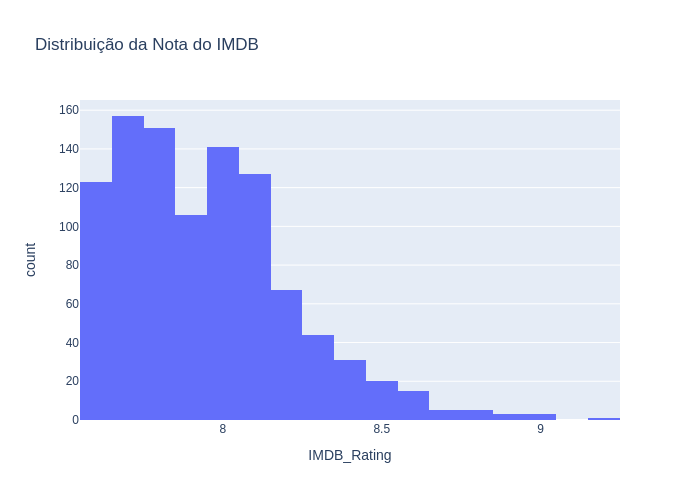

In [93]:
# Histograma para IMDB_Rating
fig_imdb = px.histogram(df, x='IMDB_Rating', nbins=20, title='Distribui√ß√£o da Nota do IMDB')
fig_imdb.show('png')

**AN√ÅLISE:** O histograma mostra uma distribui√ß√£o de notas do IMDb concentradas principalmente entre 7.6 e 8.6, com a frequ√™ncia mais alta na marca de 7.7. Isso refor√ßa a observa√ß√£o de que um n√∫mero significativo de filmes √© classificado como acima da m√©dia, mas n√£o muitos recebem notas muito altas, que estariam mais pr√≥ximas de 10. <br>

Essa consist√™ncia na distribui√ß√£o sugere que o conjunto de dados analisado tem uma dispers√£o relativamente padr√£o de notas de filmes, com a maioria dos filmes sendo considerada boa, mas n√£o excepcional, pelos usu√°rios do IMDb.

### 4.3.2. Histograma para Meta_score (M√©dia ponderada de todas as cr√≠ticas )

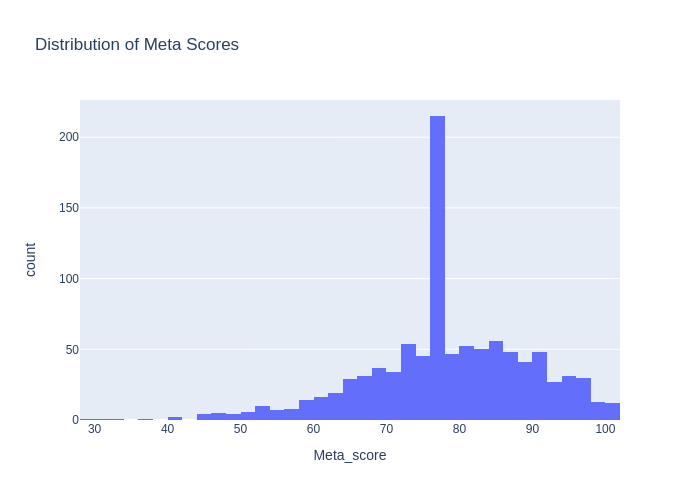

In [94]:
# Histograma para Meta_score
fig_Meta_score = px.histogram(df, x='Meta_score', title='Distribution of Meta Scores')
fig_Meta_score.show('png')

**AN√ÅLISE:** O aspecto mais interessante deste histograma √© o pico proeminente em torno da pontua√ß√£o de 76 a 77.99, onde h√° um aumento significativo na contagem em compara√ß√£o com outras faixas de pontua√ß√£o. Isso sugere que um grande n√∫mero de entradas recebeu um Meta Score em torno desse valor. O resto da distribui√ß√£o parece relativamente normal, com menos contagens nas extremidades inferior e superior da faixa de pontua√ß√£o. <br>


### 4.3.3. Histograma para No_of_Votes (N√∫mero de Votos)

In [95]:
# Histograma para No_of_Votes
fig_No_of_Votes = px.histogram(df, x='No_of_Votes', title='Distribution of Number of Votes')
fig_No_of_Votes.show('png')


**AN√ÅLISE:** O histograma de distribui√ß√£o do n√∫mero de votos mostra uma distribui√ß√£o inclinada para a direita, com a maioria dos dados concentrados no lado esquerdo, indicando que h√° mais inst√¢ncias com menos votos e menos inst√¢ncias com um grande n√∫mero de votos. Isso sugere que, a maioria dos filmes recebe apenas um pequeno n√∫mero de votos, enquanto apenas alguns recebem muitos votos.


### 4.3.4. Histograma para Gross (Faturamento)

In [96]:
# Histogram for Gross
fig_Gross = px.histogram(df, x='Gross', title='Distribution of Gross Revenue')
fig_Gross.show('png')

**AN√ÅLISE:** A barra mais alta localizada no lado esquerdo do histograma, indica que a maioria dos pontos de dados cai dentro da faixa de receita bruta mais baixa (0-100M). √Ä medida que a receita bruta aumenta, a frequ√™ncia diminui significativamente, mostrando menos ocorr√™ncias em faixas de receita bruta mais altas.



### 4.3.5. Histograma para Genre (G√™nero)




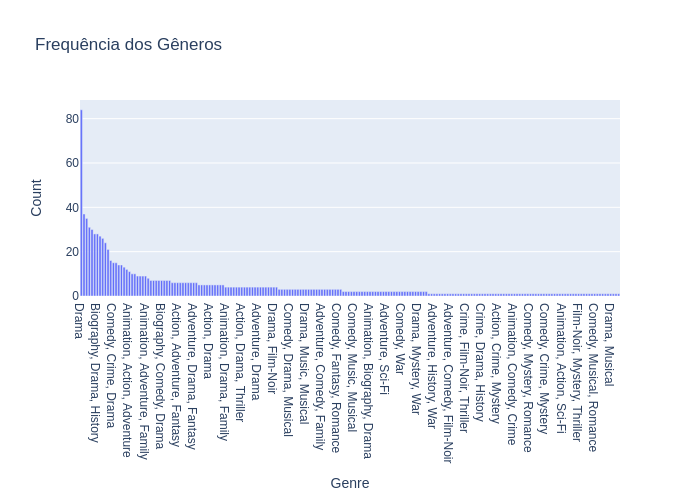

In [97]:
# Contar a frequ√™ncia de cada g√™nero e ordenar do maior para o menor
genre_counts = df['Genre'].value_counts().sort_values(ascending=False)

# Criar um DataFrame a partir da s√©rie ordenada
genre_df = pd.DataFrame({'Genre': genre_counts.index, 'Count': genre_counts.values})

# Criar o gr√°fico de barras com as barras ordenadas
fig_genre = px.bar(genre_df, x='Genre', y='Count', title='Frequ√™ncia dos G√™neros')
fig_genre.update_layout(xaxis={'categoryorder':'total descending'})
fig_genre.show('png')

**AN√ÅLISE:** Observa-se que o primeiro g√™nero, DRAMA, possui uma contagem significativamente maior (84) do que os outros, indicando uma frequ√™ncia muito mais alta. Os outros g√™neros mostram uma diminui√ß√£o progressiva na contagem, sugerindo que h√° menos itens pertencentes a esses g√™neros.

Os g√™neros listados incluem uma variedade de combina√ß√µes como "Adventure, Mystery, Thriller", "Drama, Musical", e "Crime, Drama, Sci-Fi", entre outros. A distribui√ß√£o sugere que DRAMA √© o g√™nero mais popular, enquanto os outros t√™m uma presen√ßa mais moderada ou baixa.



### 4.3.6. Histograma para Certificate (frequ√™ncia de classifica√ß√£o et√°ria)


In [98]:
# Contar a frequ√™ncia de cada classifica√ß√£o et√°ria e ordenar do maior para o menor
certificate_counts = df['Certificate'].value_counts().sort_values(ascending=False)

# Criar um DataFrame a partir da s√©rie ordenada
certificate_df = pd.DataFrame({'Certificate': certificate_counts.index, 'Count': certificate_counts.values})

# Criar o gr√°fico de barras com as barras ordenadas
fig_certificate = px.bar(certificate_df, x='Certificate', y='Count', title='Frequ√™ncia das Classifica√ß√µes Et√°rias')
fig_certificate.update_layout(xaxis={'categoryorder':'total descending'})
fig_certificate.show('png')

**AN√ÅLISE**: A categoria ‚ÄòU‚Äô tem a maior contagem de frequ√™ncia, com 335, seguida pelas  ‚ÄòA‚Äô, ‚ÄòUA‚Äô, e ‚ÄòR‚Äô, que t√™m contagens progressivamente menores, variando de 196 a 146. As categorias de ‚ÄòPG-13‚Äô a ‚ÄòApproved‚Äô t√™m frequ√™ncias relativamente baixas em compara√ß√£o com as categorias iniciais. Por fim, tanto ‚ÄòTMA-14‚Äô, ‚Äò16‚Äô, ‚ÄòTV-MA‚Äô, ‚ÄòUnrated‚Äô, ‚ÄòU/A‚Äô, ‚ÄòGP‚Äô e ‚ÄòTV-PG‚Äô t√™m as menores frequ√™ncias neste gr√°fico.

### 4.3.7. Boxplot para Faturamento e Tempo de Dura√ß√£o

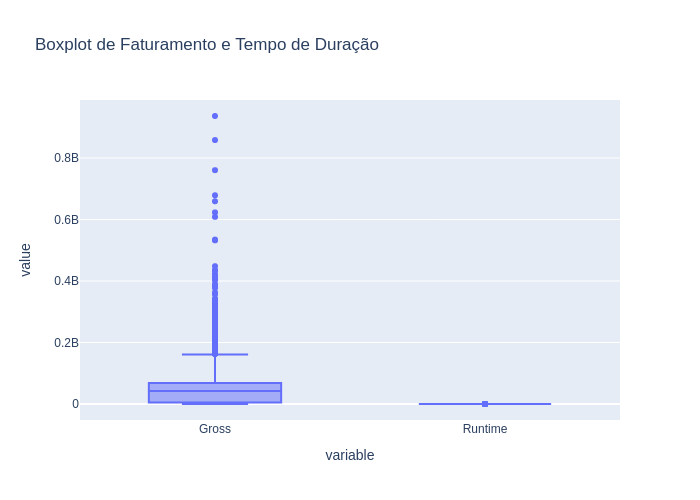

In [99]:
# Exibindo o boxplot de Faturamento e Tempo de Dura√ß√£o
fig_boxplot = px.box(df, y=['Gross', 'Runtime'], title='Boxplot de Faturamento e Tempo de Dura√ß√£o')
fig_boxplot.show('png')


**AN√ÅLISE:** O boxplot para 'Gross' mostra uma ampla gama de valores com v√°rios outliers acima do bigode superior, indicando que existem alguns valores brutos significativamente mais altos que o resto. A mediana est√° mais pr√≥xima do quartil inferior, sugerindo uma distribui√ß√£o inclinada para valores brutos mais baixos. <br>
Por outro lado, o boxplot de 'Runtime' √© muito mais compacto, sem outliers vis√≠veis, e sua mediana est√° centralizada dentro da caixa, indicando uma distribui√ß√£o mais sim√©trica dos valores de dura√ß√£o.




### 4.3.8. Scatterplot entre Nota do IMDB e Faturamento:

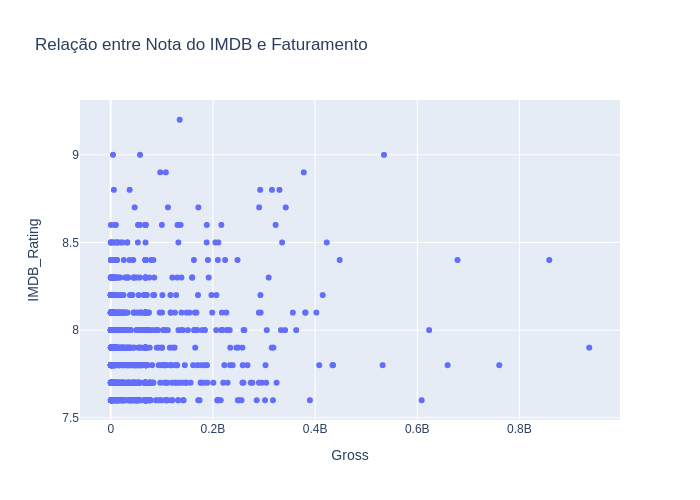

In [100]:
# Exibindo o gr√°fico de dispers√£o da rela√ß√£o entre Nota do IMDB e Faturamento
fig_scatter = px.scatter(df, x='Gross', y='IMDB_Rating', title='Rela√ß√£o entre Nota do IMDB e Faturamento')
fig_scatter.show('png')


**AN√ÅLISE:** O gr√°fico mostra pontos individuais que representam diferentes filmes, com sua posi√ß√£o determinada pela classifica√ß√£o do IMDB e pelo faturamento bruto. H√° uma concentra√ß√£o de pontos entre a faixa de classifica√ß√£o de 7.6 a 8.1 no eixo vertical, e estes est√£o espalhados por uma ampla gama de receitas brutas no eixo horizontal. Existem menos pontos com classifica√ß√µes mais altas do IMDB acima de 8.4, e estes tamb√©m abrangem v√°rias receitas brutas, mas n√£o mostram uma tend√™ncia ou correla√ß√£o clara entre a classifica√ß√£o do IMDB e a receita bruta com base nesta visualiza√ß√£o. <br>

Essa imagem √© interessante ou relevante, pois tenta visualizar qualquer rela√ß√£o potencial entre o sucesso cr√≠tico dos filmes, refletido por suas classifica√ß√µes no IMDB, e seu sucesso comercial indicado por suas receitas (faturamento). No entanto, n√£o parece haver uma correla√ß√£o vis√≠vel forte entre classifica√ß√µes mais altas e maiores receitas, sugerindo que outros fatores podem influenciar o sucesso financeiro de um filme al√©m de seu aclama√ß√£o cr√≠tica.

### 4.3.9. Boxplots para Meta Scores (M√©dia ponderada das cr√≠ticas), Number of Votes (N√∫mero de votos) e Gross (Faturamento)

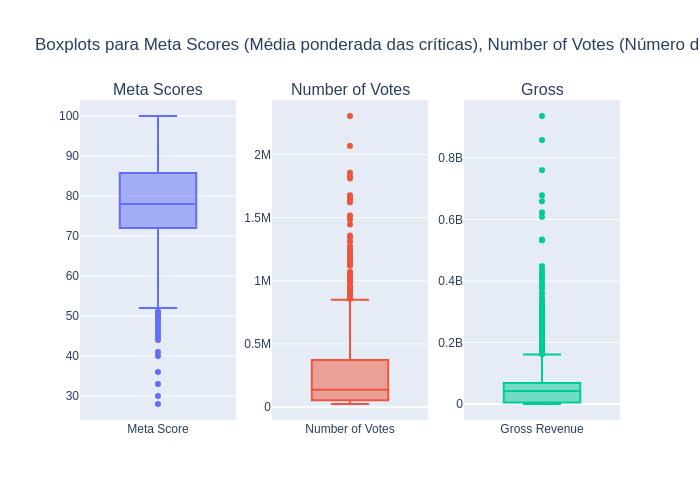

In [101]:
# Criando subplots
fig = make_subplots(rows=1, cols=3, subplot_titles=('Meta Scores', 'Number of Votes', 'Gross'))

# Adiconando boxplots aos subplots
fig.add_trace(go.Box(y=df['Meta_score'], name='Meta Score'), row=1, col=1)
fig.add_trace(go.Box(y=df['No_of_Votes'], name='Number of Votes'), row=1, col=2)
fig.add_trace(go.Box(y=df['Gross'], name='Gross Revenue'), row=1, col=3)

# Imprimeindo os boxplots
fig.update_layout(title_text='Boxplots para Meta Scores (M√©dia ponderada das cr√≠ticas), Number of Votes (N√∫mero de votos) e Gross (Faturamento)', showlegend=False)
fig.show('png')


**AN√ÅLISE:** Com base nos boxplots apresentados, tira-se as seguintes conclus√µes:

1. **Meta Scores (M√©dia ponderada das cr√≠ticas):**
   - A maioria dos filmes tem uma avalia√ß√£o pr√≥xima √† mediana, que est√° em torno de 70.
   - Existem alguns filmes com notas muito baixas (outliers abaixo do limite inferior), indicando que nem todos os filmes s√£o bem recebidos pela cr√≠tica.
   - A faixa interquartil (IQR) sugere que a maioria dos filmes est√° concentrada entre 60 e 80.

2. **N√∫mero de Votos:**
   - A mediana est√° abaixo de 1 milh√£o de votos, indicando que a maioria dos filmes n√£o recebeu uma quantidade significativa de votos.
   - No entanto, h√° v√°rios filmes com um n√∫mero excepcionalmente alto de votos (outliers acima do limite superior).
   - Isso sugere que alguns filmes atraem uma base de f√£s muito grande, enquanto outros n√£o.

3. **Faturamento (Gross):**
   - A mediana do faturamento est√° em torno de 0,2 bilh√£o.
   - A IQR indica que a maioria dos filmes tem um faturamento entre 0,05 bilh√£o e 0,25 bilh√£o.
   - Alguns filmes t√™m faturamentos extremamente altos (outliers acima do limite superior), possivelmente devido a grandes sucessos de bilheteria.



## 4.4. Tratamento de Outliers
> Em setores onde grandes varia√ß√µes s√£o comuns, como na ind√∫stria do cinema, a presen√ßa de outliers √© frequentemente uma indica√ß√£o de filmes que se destacam de forma significativa. Esses outliers podem representar tanto grandes sucessos quanto fracassos not√°veis, ambos essenciais para uma compreens√£o completa do desempenho e das tend√™ncias no setor cinematogr√°fico. Portanto, ao n√£o tratar ou remover esses outliers, garantimos que a an√°lise e os modelos preditivos mantenham a integridade e a representatividade dos dados.


### Justificativa para o N√£o Tratamento de Outliers

Em setores onde grandes varia√ß√µes s√£o comuns, como na ind√∫stria do cinema, a presen√ßa de outliers √© frequentemente uma indica√ß√£o de filmes que se destacam de forma significativa. Esses outliers podem representar tanto grandes sucessos quanto fracassos not√°veis, ambos essenciais para uma compreens√£o completa do desempenho e das tend√™ncias no setor cinematogr√°fico. Portanto, ao n√£o tratar ou remover esses outliers, garantimos que a an√°lise e os modelos preditivos mantenham a integridade e a representatividade dos dados. Aqui est√£o algumas raz√µes espec√≠ficas para n√£o tratar os outliers nesta base de dados:

1. **Representatividade dos Dados**:
   - **Filmes de Sucesso**: Filmes que alcan√ßaram grande sucesso em termos de bilheteria, n√∫mero de votos ou altas notas de cr√≠ticos e do p√∫blico s√£o importantes para a an√°lise. Remover esses outliers pode levar a uma sub-representa√ß√£o de filmes que definem tend√™ncias ou que s√£o marcos na ind√∫stria.
   - **Fracassos Significativos**: Da mesma forma, filmes que tiveram desempenho excepcionalmente ruim tamb√©m fornecem insights valiosos sobre os fatores que podem levar ao fracasso.

2. **Varia√ß√£o Intr√≠nseca da Ind√∫stria**:
   - A ind√∫stria cinematogr√°fica √© caracterizada por uma grande varia√ß√£o no desempenho dos filmes. Essa varia√ß√£o √© esperada e natural, refletindo diversos fatores como or√ßamento, marketing, elenco, cr√≠tica e aceita√ß√£o do p√∫blico. Ao manter os outliers, preservamos a complexidade e a variabilidade inerente ao setor.

3. **Import√¢ncia para Modelos Preditivos**:
   - **Modelos de Regress√£o**: Em um modelo de regress√£o, outliers podem ajudar a capturar extremos e a ajustar o modelo para que ele possa fazer previs√µes mais precisas em uma faixa mais ampla de valores.
   - **Modelos de Classifica√ß√£o**: Para problemas de classifica√ß√£o, os outliers podem ser cruciais para identificar classes minorit√°rias ou comportamentos excepcionais.

4. **Insights de Neg√≥cios**:
   - Filmes que se destacam podem proporcionar insights valiosos sobre o que contribui para um sucesso inesperado ou um fracasso. Isso pode informar decis√µes estrat√©gicas em produ√ß√£o, marketing e distribui√ß√£o.

5. **Equidade e Inclus√£o**:
   - Remover outliers pode inadvertidamente introduzir vieses, especialmente se esses outliers representam filmes de nichos ou g√™neros espec√≠ficos que s√£o sub-representados na amostra. Manter todos os dados ajuda a garantir que todas as vozes e experi√™ncias sejam consideradas.

### Exemplos Concretos
- **"Avengers: Endgame"**: Com receitas de bilheteria extraordinariamente altas, este filme √© um outlier que demonstra o potencial de receitas na ind√∫stria cinematogr√°fica moderna.
- **"The Room"**: Considerado um dos piores filmes j√° feitos, seu desempenho peculiar fornece insights sobre filmes de culto e fracassos not√°veis.

### Conclus√£o
> Portanto, ao n√£o tratar os outliers na base de dados, asseguramos que todas as nuances e varia√ß√µes significativas da ind√∫stria cinematogr√°fica sejam capturadas. Isso n√£o s√≥ melhora a precis√£o dos modelos preditivos, mas tamb√©m fornece uma vis√£o mais completa e informada do setor, permitindo decis√µes estrat√©gicas mais acertadas e uma compreens√£o mais profunda das din√¢micas do mercado cinematogr√°fico.

# **5. HIP√ìTESES DE NEG√ìCIOS**




## 5.1.   Qual filme voc√™ recomendaria para uma pessoa que voc√™ n√£o conhece?




Ao indicar um filme, √© crucial considerar o gosto pessoal do indiv√≠duo. Se a pessoa possui um g√™nero favorito, obras aclamadas dentro dessa categoria ser√£o sugeridas. <br>

No entanto, se a pessoa n√£o demonstra uma prefer√™ncia espec√≠fica por g√™neros, explorar filmes com altas avalia√ß√µes pode ser uma √≥tima alternativa. Afinal, quanto mais bem avaliado um filme for, maior a probabilidade de agrado do p√∫blico em geral. Essa estrat√©gia aumenta as chances de encontrar uma obra que agrade o espectador, mesmo que ele ainda n√£o tenha um g√™nero favorito definido.

In [102]:
# Filtrando os filmes com avalia√ß√£o maior que 8,5
filmes_alta_avaliacao = df[df['IMDB_Rating'] > 8.5]

# Ordenando os filmes pela nota do IMDB em ordem decrescente
filmes_ordenados = filmes_alta_avaliacao.sort_values(by='IMDB_Rating', ascending=False)

# Exibindo os filmes ordenados com suas respectivas notas
print("Filmes com avalia√ß√£o maior que 8,5 que ser√£o indicados a uma pessoa desconhecida:")
for index, row in filmes_ordenados.iterrows():
    print(f"{row['Series_Title']} - Nota IMDB: {row['IMDB_Rating']}")

Filmes com avalia√ß√£o maior que 8,5 que ser√£o indicados a uma pessoa desconhecida:
The Godfather - Nota IMDB: 9.2
The Godfather: Part II - Nota IMDB: 9.0
12 Angry Men - Nota IMDB: 9.0
The Dark Knight - Nota IMDB: 9.0
The Lord of the Rings: The Return of the King - Nota IMDB: 8.9
Pulp Fiction - Nota IMDB: 8.9
Schindler's List - Nota IMDB: 8.9
Inception - Nota IMDB: 8.8
Fight Club - Nota IMDB: 8.8
The Lord of the Rings: The Fellowship of the Ring - Nota IMDB: 8.8
Forrest Gump - Nota IMDB: 8.8
Il buono, il brutto, il cattivo - Nota IMDB: 8.8
Goodfellas - Nota IMDB: 8.7
Star Wars: Episode V - The Empire Strikes Back - Nota IMDB: 8.7
One Flew Over the Cuckoo's Nest - Nota IMDB: 8.7
The Matrix - Nota IMDB: 8.7
The Lord of the Rings: The Two Towers - Nota IMDB: 8.7
The Green Mile - Nota IMDB: 8.6
Shichinin no samurai - Nota IMDB: 8.6
Seppuku - Nota IMDB: 8.6
Star Wars - Nota IMDB: 8.6
The Silence of the Lambs - Nota IMDB: 8.6
Se7en - Nota IMDB: 8.6
La vita √® bella - Nota IMDB: 8.6
Saving P

Caso a pessoa em quest√£o tenha um g√™nero de filme favorito, a indica√ß√£o seria escolher o filme ou os filmes mais bem avaliados de acordo com o g√™nero:

In [103]:
# Obtendo os valores √∫nicos na coluna 'Genre' (g√™nero)
valores_unicos_coluna1 = df['Genre'].unique()

# Ordenando os valores em ordem alfab√©tica
valores_unicos_coluna1.sort()

# Exibindo os valores √∫nicos ordenados por ordem alfab√©tica indicando os g√™neros de filmes poss√≠veis:
print(f"G√™neros dos filmes: {valores_unicos_coluna1}")

G√™neros dos filmes: ['Action, Adventure' 'Action, Adventure, Biography'
 'Action, Adventure, Comedy' 'Action, Adventure, Crime'
 'Action, Adventure, Drama' 'Action, Adventure, Family'
 'Action, Adventure, Fantasy' 'Action, Adventure, History'
 'Action, Adventure, Horror' 'Action, Adventure, Mystery'
 'Action, Adventure, Romance' 'Action, Adventure, Sci-Fi'
 'Action, Adventure, Thriller' 'Action, Adventure, War'
 'Action, Adventure, Western' 'Action, Biography, Crime'
 'Action, Biography, Drama' 'Action, Comedy, Crime'
 'Action, Comedy, Fantasy' 'Action, Comedy, Mystery'
 'Action, Comedy, Romance' 'Action, Crime, Comedy' 'Action, Crime, Drama'
 'Action, Crime, Mystery' 'Action, Crime, Thriller' 'Action, Drama'
 'Action, Drama, History' 'Action, Drama, Mystery' 'Action, Drama, Sci-Fi'
 'Action, Drama, Sport' 'Action, Drama, Thriller' 'Action, Drama, War'
 'Action, Drama, Western' 'Action, Mystery, Thriller' 'Action, Sci-Fi'
 'Action, Sci-Fi, Thriller' 'Action, Thriller'
 'Adventure, Bio

In [105]:
# Solicitando ao usu√°rio o g√™nero favorito
genero_favorito = input("Digite o seu g√™nero de filme favorito: ")

# Filtrando os filmes pelo g√™nero favorito
filmes_por_genero = df[df['Genre'] == genero_favorito]

# Encontrando a maior avalia√ß√£o no IMDB para o g√™nero selecionado
maior_avaliacao = filmes_por_genero['IMDB_Rating'].max()

# Filtrando os filmes que t√™m a maior avalia√ß√£o no IMDB
filmes_maior_avaliacao = filmes_por_genero[filmes_por_genero['IMDB_Rating'] == maior_avaliacao][['Series_Title', 'IMDB_Rating']]

# Listando os filmes com a maior avalia√ß√£o de acordo com o g√™nero de filme escolhido
print(f"Os filmes com a maior avalia√ß√£o no IMDB no g√™nero '{genero_favorito}' s√£o:")
for index, row in filmes_maior_avaliacao.iterrows():
    print(f"{row['Series_Title']} - Nota IMDB: {row['IMDB_Rating']}")

Digite o seu g√™nero de filme favorito: Crime, Drama
Os filmes com a maior avalia√ß√£o no IMDB no g√™nero 'Crime, Drama' s√£o:
The Godfather - Nota IMDB: 9.2


Assim, se, por exemplo, o g√™nero favorito da pessoa for 'Crime, Drama', o filme indicado seria: The Godfather, que tem uma excelente avalia√ß√£o de 9.2 e √© um cl√°ssico atemporal que se destaca por sua hist√≥ria envolvente, personagens memor√°veis, dire√ß√£o impec√°vel e reflex√µes profundas. Considerado por muitos o melhor filme de todos os tempos, √© uma obra obrigat√≥ria para qualquer cin√©filo que busca uma experi√™ncia cinematogr√°fica enriquecedora e marcante.

## 5.2.   Quais s√£o os principais fatores que est√£o relacionados com alta expectativa de faturamento de um filme?



In [106]:
# Selecionando apenas as colunas num√©ricas para a matriz de correla√ß√£o
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculando a matriz de correla√ß√£o
correlation_matrix_img = numeric_df.corr()

# Gerando o mapa de calor
fig_matrix = px.imshow(correlation_matrix_img, color_continuous_scale='viridis', title='Matriz de Correla√ß√£o')

# Mostrar a figura
fig_matrix.show('png')

In [107]:
# Calculando a matriz de correla√ß√£o
correlation_matrix = numeric_df.corr()

# Exibir a matriz de correla√ß√£o
correlation_matrix

Unnamed: 0  Released_Year   Runtime  IMDB_Rating  Meta_score  \
Unnamed: 0       1.000000       0.048169 -0.237519    -0.946472   -0.242474   
Released_Year    0.048169       1.000000  0.165765    -0.133257   -0.289287   
Runtime         -0.237519       0.165765  1.000000     0.242751   -0.027926   
IMDB_Rating     -0.946472      -0.133257  0.242751     1.000000    0.256122   
Meta_score      -0.242474      -0.289287 -0.027926     0.256122    1.000000   
No_of_Votes     -0.373076       0.246005  0.172483     0.479308   -0.019238   
Gross           -0.063324       0.192868  0.124919     0.092968   -0.030809   

               No_of_Votes     Gross  
Unnamed: 0       -0.373076 -0.063324  
Released_Year     0.246005  0.192868  
Runtime           0.172483  0.124919  
IMDB_Rating       0.479308  0.092968  
Meta_score       -0.019238 -0.030809  
No_of_Votes       1.000000  0.563484  
Gross             0.563484  1.000000

### 5.2.1. Principais Percep√ß√µes:

1. **Correla√ß√£o entre `IMDB_Rating` e `No_of_Votes` (0.479308)**:
   - Existe uma correla√ß√£o moderada positiva entre a avalia√ß√£o do IMDB e o n√∫mero de votos. Isso sugere que filmes bem avaliados tendem a receber mais votos, ou vice-versa.

2. **Correla√ß√£o entre `No_of_Votes` e `Gross` (0.563484)**:
   - Existe uma correla√ß√£o moderada positiva entre o n√∫mero de votos e o faturamento. Filmes que recebem mais votos tendem a ter maior faturamento. Isso pode ser devido √† popularidade: filmes populares t√™m mais espectadores e, portanto, maior receita.

3. **Correla√ß√£o entre `IMDB_Rating` e `Meta_score` (0.256122)**:
   - Existe uma correla√ß√£o positiva fraca entre a avalia√ß√£o do IMDB e a pontua√ß√£o Meta. Isso indica que, embora haja alguma rela√ß√£o, n√£o √© muito forte, sugerindo que cr√≠ticos e p√∫blico podem ter opini√µes divergentes sobre filmes.

4. **Correla√ß√£o negativa entre `IMDB_Rating` e `Unnamed: 0` (-0.946472)**:
   - Uma forte correla√ß√£o negativa entre `Unnamed: 0` e `IMDB_Rating` n√£o √© intuitiva e pode sugerir que `Unnamed: 0` (talvez uma coluna de √≠ndice) tenha alguma rela√ß√£o artificial ou n√£o significativa com as avalia√ß√µes do IMDB. Isso deve ser investigado ou ignorado se for um √≠ndice.

5. **Correla√ß√£o entre `Released_Year` e `No_of_Votes` (0.246005)**:
   - H√° uma correla√ß√£o fraca positiva entre o ano de lan√ßamento e o n√∫mero de votos. Filmes mais recentes tendem a receber mais votos, possivelmente devido ao aumento no uso de plataformas online e m√≠dias sociais.

6. **Correla√ß√£o entre `Released_Year` e `Gross` (0.192868)**:
   - Existe uma correla√ß√£o fraca positiva entre o ano de lan√ßamento e o faturamento. Filmes mais recentes tendem a ter maior faturamento, o que pode estar relacionado √† infla√ß√£o e ao aumento dos pre√ßos dos ingressos.

### Fatores Relacionados com Alta Expectativa de Faturamento:

1. **N√∫mero de Votos (`No_of_Votes`)**:
   - A correla√ß√£o mais forte com o faturamento √© o n√∫mero de votos. Filmes com mais votos tendem a ter maior faturamento, indicando que a popularidade √© um fator crucial.

2. **Ano de Lan√ßamento (`Released_Year`)**:
   - Filmes mais recentes tendem a ter maior faturamento, embora a correla√ß√£o n√£o seja muito forte. Isso pode ser devido a melhorias na tecnologia de marketing e distribui√ß√£o.

3. **Runtime**:
   - Existe uma correla√ß√£o positiva fraca com o faturamento. Filmes mais longos tendem a ter maior faturamento, possivelmente devido a valores de produ√ß√£o mais altos e maior profundidade da hist√≥ria.

### Conclus√£o:

> A an√°lise da matriz de correla√ß√£o indica que a popularidade (medida pelo n√∫mero de votos) √© um dos principais fatores relacionados ao alto faturamento de um filme. Al√©m disso, o ano de lan√ßamento e o tempo de dura√ß√£o do filme tamb√©m mostram correla√ß√µes positivas com o faturamento, sugerindo que filmes mais recentes e mais longos tendem a gerar mais receita. As avalia√ß√µes do IMDB e as pontua√ß√µes Meta t√™m correla√ß√µes mais fracas com o faturamento, indicando que outros fatores podem ser mais influentes na gera√ß√£o de receita.

## 5.3.   Quais insights podem ser tirados com a coluna Overview? √â poss√≠vel inferir o g√™nero do filme a partir dessa coluna?

### 5.3.1 Mapa de Palavras

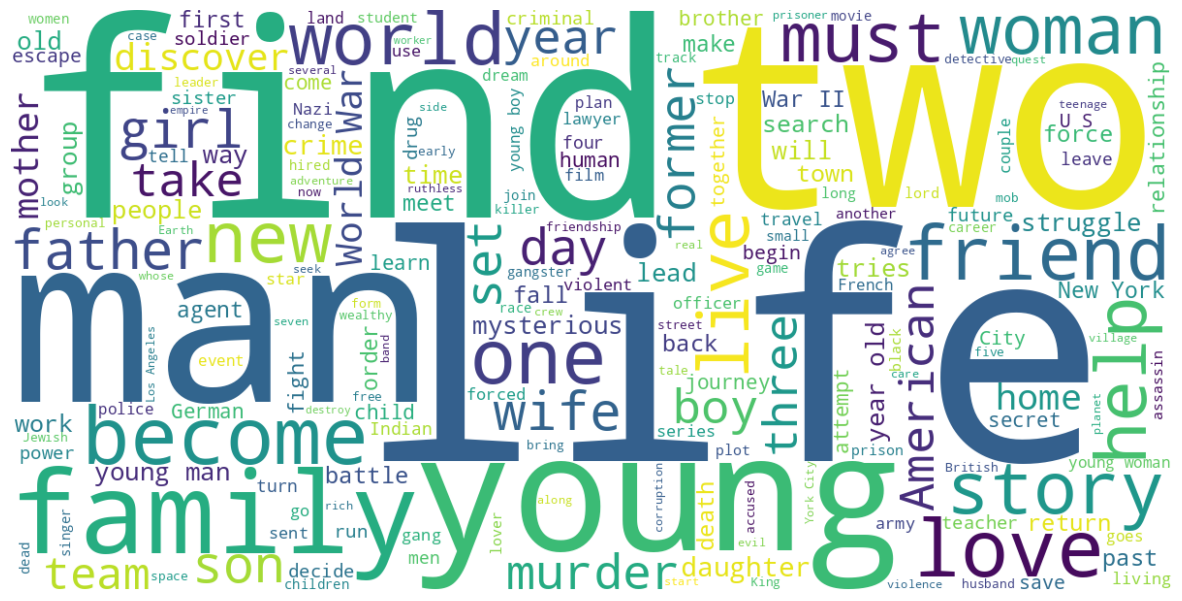

In [108]:
# Juntando todos os textos da coluna 'Overview'
text = " ".join(review for review in df['Overview'].astype(str))

# Gerando o mapa de palavras
wordcloud = WordCloud(width=1200, height=600, background_color ='white').generate(text)

# Plotando o mapa de palavras
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


O mapa de palavras gerado a partir da coluna "Overview" oferece insights interessantes sobre os temas e conceitos frequentes nos resumos dos filmes:

1. **Temas Recorrentes**:
   - As palavras "love", "life" e "family" s√£o proeminentes. Isso sugere que muitos filmes abordam relacionamentos, crescimento pessoal e la√ßos familiares.
   - "World", "story" e "find" tamb√©m aparecem, indicando que as hist√≥rias podem se desenrolar em diferentes contextos e envolver descobertas ou jornadas.
   - A presen√ßa de "young" sugere que muitos filmes podem ter protagonistas jovens ou explorar temas da juventude.

2. **G√™nero do Filme**:
   - Infelizmente, inferir o g√™nero do filme apenas com base na coluna "Overview" pode ser desafiador. Embora algumas palavras possam sugerir g√™neros espec√≠ficos (por exemplo, "murder" para suspense ou crime), a variedade de termos presentes torna dif√≠cil uma classifica√ß√£o definitiva.

3. **Limita√ß√µes:**
   - A nuvem de palavras n√£o considera contexto ou estrutura narrativa. Portanto, n√£o pode-se afirmar com certeza o g√™nero de um filme apenas com base nesses termos.

> Em resumo, a coluna "Overview", com base no mapa de palavras, fornece uma vis√£o geral dos temas e t√≥picos abordados nos filmes, mas n√£o √© suficiente para determinar o g√™nero com precis√£o.

### 5.3.2. An√°lise de t√≥picos

In [109]:
# Pr√©-processamento de texto
df['Overview'] = df['Overview'].str.lower().str.replace('[^\w\s]', '')

# Fun√ß√£o para obter o sentimento
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Aplicando a fun√ß√£o de sentimento
df['Sentiment'] = df['Overview'].apply(get_sentiment)

# Contagem de filmes por valor de sentimento
sentiment_counts = df['Sentiment'].value_counts().sort_index()

# Exibindo resumo estat√≠stico
print("Resumo Estat√≠stico do Sentimento:")
print(df['Sentiment'].describe())


Resumo Estat√≠stico do Sentimento:
count    999.000000
mean       0.010785
std        0.250074
min       -1.000000
25%       -0.100000
50%        0.000000
75%        0.136364
max        1.000000
Name: Sentiment, dtype: float64


In [35]:
# Preprocessamento de texto
df['Overview'] = df['Overview'].str.lower().str.replace('[^\w\s]', '')

# Fun√ß√£o para obter o sentimento
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Aplicando a fun√ß√£o de sentimento
df['Sentiment'] = df['Overview'].apply(get_sentiment)

# Visualiza√ß√£o a distribui√ß√£o dos valores de sentimento com Plotly
fig_sentimento = px.histogram(df, x='Sentiment', nbins=20, title='Distribui√ß√£o dos Valores de Sentimento',
                   labels={'Sentiment': 'Sentimento'}, marginal='box', histnorm='percent')

fig_sentimento.update_layout(
    xaxis_title='Sentimento',
    yaxis_title='Frequ√™ncia (%)',
    bargap=0.2
)

fig_sentimento.show('png')


A an√°lise estat√≠stica do sentimento das sinopses de filmes pode fornecer algumas infer√™ncias interessantes:

1. **Neutralidade predominante**: A mediana do sentimento pr√≥ximo a zero sugere que muitas sinopses tendem a ser neutras em termos de polaridade emocional.

2. **Variedade de sentimentos**: A amplitude dos valores de sentimento (de -1 a 1) indica que h√° uma diversidade de emo√ß√µes expressas nas sinopses, desde sentimentos positivos at√© negativos.

3. **Distribui√ß√£o assim√©trica**: A distribui√ß√£o dos valores de sentimento, com um desvio padr√£o relativamente alto (0.250), sugere uma dispers√£o dos sentimentos, com alguns filmes expressando emo√ß√µes fortes (positivas ou negativas) e outros sendo mais neutros.

4. **Infer√™ncia sobre conte√∫do**: Filmes com sentimento extremamente negativo ou positivo podem indicar g√™neros ou temas espec√≠ficos que evocam essas emo√ß√µes. Por exemplo, filmes de terror podem ter sinopses com sentimentos negativos, enquanto filmes de com√©dia podem ter uma tend√™ncia mais positiva.

5. **Potencial para an√°lises adicionais**: Com base nesses dados, pode-se explorar mais a fundo quais g√™neros ou tipos de filmes tendem a ter sentimentos mais extremos, o que pode ser √∫til para entender prefer√™ncias de p√∫blico ou para recomenda√ß√£o de conte√∫do.


### 5.3.3. An√°lise de T√≥picos com LDA
Usando o LDA para identificar t√≥picos dentro dos resumos dos filmes.

In [110]:
# Vetoriza√ß√£o com CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['Overview'])

# Aplica√ß√£o do LDA
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(dtm)

# Visualiza√ß√£o dos t√≥picos
for index, topic in enumerate(lda.components_):
    print(f'Topic #{index}:')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

Topic #0:
['girl', 'old', 'boy', 'wife', 'young', 'murder', 'love', 'man', 'family', 'life']


Topic #1:
['story', 'father', 'army', 'new', 'ii', 'man', 'young', 'life', 'world', 'war']


Topic #2:
['dead', 'story', 'finds', 'school', 'father', 'mother', 'girl', 'new', 'young', 'man']


Topic #3:
['american', 'crime', 'world', 'love', 'life', 'man', 'young', 'year', 'old', 'family']


Topic #4:
['past', 'love', 'new', 'help', 'years', 'story', 'man', 'life', 'young', 'woman']




**An√°lise de T√≥picos com LDA nas Sinopses de Filmes:**

A an√°lise de t√≥picos com LDA revelou temas potenciais presentes nas sinopses dos filmes:

1. **T√≥pico #0: Rela√ß√µes Familiares e Amorosas**
   - Palavras-chave: ['girl', 'old', 'boy', 'wife', 'young', 'murder', 'love', 'man', 'family', 'life']
   - Poss√≠vel tema: Narrativas que exploram rela√ß√µes familiares e amorosas, envolvendo personagens jovens e quest√µes de vida e morte.

2. **T√≥pico #1: Guerra e Rela√ß√µes Familiares**
   - Palavras-chave: ['story', 'father', 'army', 'new', 'ii', 'man', 'young', 'life', 'world', 'war']
   - Poss√≠vel tema: Filmes que abordam a guerra, com foco em rela√ß√µes familiares e experi√™ncias de vida ligadas ao contexto militar.

3. **T√≥pico #2: Mist√©rio e Rela√ß√µes Familiares**
   - Palavras-chave: ['dead', 'story', 'finds', 'school', 'father', 'mother', 'girl', 'new', 'young', 'man']
   - Poss√≠vel tema: Narrativas que envolvem elementos de mist√©rio, morte e rela√ß√µes familiares, possivelmente com um contexto escolar ou juvenil.

4. **T√≥pico #3: Crime, Amor e Vida**
   - Palavras-chave: ['american', 'crime', 'world', 'love', 'life', 'man', 'young', 'year', 'old', 'family']
   - Poss√≠vel tema: Filmes que exploram crime e amor, contextualizados em diferentes √©pocas e ambientes familiares e sociais.

Esses t√≥picos fornecem uma vis√£o geral dos temas predominantes nas sinopses de filmes analisadas. No entanto, a an√°lise de t√≥picos n√£o define o g√™nero de um filme de forma direta, mas fornece pistas valiosas para a interpreta√ß√£o.


### 5.3.4. Previs√£o do g√™nero de acordo com a sinopse de um novo filme

**Escolha do Modelo**

Foi utilizado o modelo de aprendizado profundo `DistilBERT`, um modelo transformer pr√©-treinado desenvolvido para tarefas de Processamento de Linguagem Natural (NLP), como classifica√ß√£o de texto. A decis√£o foi motivada pelos seguintes fatores:

1. **Capacidade de Capturar Contexto**:
   - Modelos baseados em transformers, como `DistilBERT`, s√£o capazes de capturar depend√™ncias de longo alcance e contextos complexos dentro dos textos. Isso √© particularmente √∫til para a tarefa de inferir o g√™nero de filmes a partir de sinopses, j√° que a descri√ß√£o do enredo pode conter informa√ß√µes sutis e variadas que determinam o g√™nero.

2. **Desempenho Superior em Tarefas de NLP**:
   - `DistilBERT` tem se mostrado eficaz em v√°rias tarefas de NLP, incluindo classifica√ß√£o de texto, devido √† sua arquitetura robusta e capacidade de ser treinado em grandes corpora de texto. Sua efici√™ncia computacional tamb√©m √© uma vantagem significativa.

3. **Maneira de Lidar com Desbalanceamento de Dados**:
   - A fun√ß√£o de perda personalizada com pesos das classes foi implementada para lidar com o desbalanceamento dos g√™neros nos dados. Isso permite que o modelo preste mais aten√ß√£o a g√™neros menos representados, melhorando assim a precis√£o e o recall para esses casos.

**Insights da Coluna "Overview"**

1. **Riqueza de Informa√ß√£o Textual**:
   - A coluna "Overview" cont√©m resumos dos enredos dos filmes, proporcionando uma fonte rica de informa√ß√£o textual. Essas descri√ß√µes incluem personagens, cen√°rios e eventos que s√£o indicativos dos g√™neros do filme.

2. **Padr√µes de Linguagem**:
   - Ao analisar os padr√µes de linguagem e as palavras-chave presentes nos resumos, o modelo pode aprender a associar certas palavras e frases com g√™neros espec√≠ficos. Por exemplo, palavras como "aventura", "miss√£o", "batalha" podem estar frequentemente associadas ao g√™nero "Action" ou "Adventure".

3. **Capacidade de Generaliza√ß√£o**:
   - Utilizando um modelo treinado em uma grande quantidade de exemplos rotulados, podemos generalizar e inferir o g√™nero de novos filmes a partir dos resumos.

In [111]:
# Limpeza e Normaliza√ß√£o do Texto
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

df['Overview'] = df['Overview'].apply(clean_text)

# Dividir os dados em treino e teste
X = df['Overview']
y = df['Genre'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

# Binarizar os g√™neros
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokeniza√ß√£o
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=512)

class IMDbDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float)
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = IMDbDataset(train_encodings, y_train)
test_dataset = IMDbDataset(test_encodings, y_test)

# Calcular pesos das classes
class_counts = y_train.sum(axis=0)
class_weights = 1.0 / (class_counts + 1e-5)
weights = class_weights / class_weights.sum()
weights = torch.tensor(weights, dtype=torch.float)

# Carregar o modelo com fun√ß√£o de perda ponderada
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=y.shape[1])

# Definir a fun√ß√£o de perda ponderada
def custom_loss_fn(labels, logits):
    loss_fct = torch.nn.BCEWithLogitsLoss(weight=weights)
    return loss_fct(logits, labels)

# Substituir a fun√ß√£o de perda padr√£o pela customizada
model.classifier.loss_fn = custom_loss_fn

# Configura√ß√£o do treinamento
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy='epoch'
)

# Definir a fun√ß√£o de m√©trica
def compute_metrics(pred):
    labels = pred.label_ids
    preds = (torch.sigmoid(torch.tensor(pred.predictions)) > 0.5).int()
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted', zero_division=1)
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# Treinar o modelo
trainer.train()


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead



TrainOutput(global_step=500, training_loss=0.34942289447784425, metrics={'train_runtime': 1592.0832, 'train_samples_per_second': 2.509, 'train_steps_per_second': 0.314, 'total_flos': 61003530893070.0, 'train_loss': 0.34942289447784425, 'epoch': 5.0})

In [112]:
# Avaliar o modelo
predictions, labels, _ = trainer.predict(test_dataset)
predictions = torch.sigmoid(torch.tensor(predictions)).numpy()
predicted_labels = (predictions > 0.5).astype(int)

print(classification_report(y_test, predicted_labels, target_names=mlb.classes_))

              precision    recall  f1-score   support

      Action       0.59      0.29      0.39        34
   Adventure       0.81      0.42      0.56        40
   Animation       0.00      0.00      0.00        18
   Biography       0.78      0.28      0.41        25
      Comedy       0.40      0.09      0.14        46
       Crime       0.70      0.53      0.61        43
       Drama       0.86      0.89      0.87       157
      Family       0.00      0.00      0.00         5
     Fantasy       0.00      0.00      0.00         9
   Film-Noir       0.00      0.00      0.00         3
     History       0.00      0.00      0.00         8
      Horror       0.00      0.00      0.00        10
       Music       0.00      0.00      0.00         9
     Musical       0.00      0.00      0.00         4
     Mystery       0.00      0.00      0.00        23
     Romance       0.00      0.00      0.00        21
      Sci-Fi       0.00      0.00      0.00        11
       Sport       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



In [113]:
# Exemplo de previs√£o para um novo filme, usando a sinopse do filme Shrek (2001)
new_overview = ["In a bid to get his land back, Shrek agrees to retrieve Princess Fiona for the fairytale-hating Lord Farquaad of Duloc, but falls in love with her on the way."]
new_encodings = tokenizer(new_overview, truncation=True, padding=True, max_length=512, return_tensors='pt')

In [114]:
model.eval()
with torch.no_grad():
    outputs = model(**new_encodings)
    predicted_genre = torch.sigmoid(outputs.logits).numpy()[0]
    predicted_genre_array = np.array([predicted_genre > 0.5])
    predicted_genre_labels = mlb.inverse_transform(predicted_genre_array)[0]
    print(f"G√™nero Previsto: {predicted_genre_labels}")

G√™nero Previsto: ('Adventure',)


In [115]:
# Salvar o modelo
model_path = './distilbert_imdb_model.pkl'
joblib.dump(model, model_path)
print(f"Modelo salvo em {model_path}")

# Carregar o modelo
# loaded_model = joblib.load(model_path)


Modelo salvo em ./distilbert_imdb_model.pkl


#### 5.3.4.1. An√°lise do Algoritmo de Classifica√ß√£o de G√™neros de Filmes


Para testar o modelo, foi utilizada a sinopse do filme "Shrek":

> "In a bid to get his land back, Shrek agrees to retrieve Princess Fiona for the fairytale-hating Lord Farquaad of Duloc, but falls in love with her on the way."

**Interpreta√ß√£o dos Resultados**

O modelo previu corretamente "Adventure" como um dos g√™neros do filme "Shrek". Isso demonstra a aplicabilidade pr√°tica do modelo em cen√°rios do mundo real.

Os resultados tamb√©m indicam que o modelo apresenta um desempenho misto. Alguns g√™neros, como "Action", "Adventure" e "Drama", t√™m uma precis√£o, recall e F1-score razo√°veis, sugerindo que o modelo consegue identificar esses g√™neros com certa efic√°cia. No entanto, muitos g√™neros, como "Animation", "Biography" e "Comedy", t√™m valores de precis√£o, recall e F1-score muito baixos, indicando dificuldade em prever esses g√™neros corretamente.

- **G√™neros Bem Classificados**: "Action", "Adventure" e "Drama" tiveram melhores resultados em termos de precis√£o e recall.
- **G√™neros Mal Classificados**: "Animation", "Biography", "Comedy" e outros g√™neros com suporte menor sofreram com baixa precis√£o e recall, possivelmente devido ao desbalanceamento dos dados.



#### 5.3.4.2 Conclus√£o

O `DistilBERT`, aplicado √† classifica√ß√£o sequencial, revelou-se competente para identificar g√™neros cinematogr√°ficos predominantes, embora tenha enfrentado desafios com categorias menos frequentes no dataset de treinamento. A implementa√ß√£o de uma fun√ß√£o de perda customizada, que considera o peso das classes, contribuiu para atenuar a disparidade dos dados. No entanto, ainda h√° margem para aprimoramentos, como a ado√ß√£o de estrat√©gias de equil√≠brio de dados ou o enriquecimento do conjunto de dados para os g√™neros sub-representados.

A sele√ß√£o do modelo `DistilBERT` foi uma escolha t√°tica, visando avaliar o potencial informativo da se√ß√£o "Overview" na identifica√ß√£o dos g√™neros f√≠lmicos. A efic√°cia do modelo em prever acertadamente os g√™neros com base nos resumos refor√ßa a viabilidade de se deduzir o g√™nero cinematogr√°fico a partir deste elemento. Esse conhecimento √© valioso para uma s√©rie de aplica√ß√µes, incluindo a recomenda√ß√£o personalizada de filmes, a categoriza√ß√£o autom√°tica em servi√ßos de streaming e estudos de mercado do setor audiovisual.

> *Com base nos resultados, pode-se afirmar que a coluna "Overview" possui um potencial significativo para fornecer insights sobre os g√™neros dos filmes. A efic√°cia do modelo `DistilBERT` em classificar corretamente os g√™neros a partir dos resumos indica que, sim, √© poss√≠vel inferir o g√™nero do filme utilizando as informa√ß√µes contidas nessa coluna.*

# **6. Prevendo a nota do IMDB**

* Explique como voc√™ faria a previs√£o da nota do imdb a partir dos dados.
* Quais vari√°veis e/ou suas transforma√ß√µes voc√™ utilizou e por qu√™? <br>
* Qual tipo de problema estamos resolvendo (regress√£o, classifica√ß√£o)? <br>
* Qual modelo melhor se aproxima dos dados e quais seus pr√≥s e contras? <br>
 * Qual medida de performance do modelo foi escolhida e por qu√™? <br>

> Supondo um filme com as seguintes caracter√≠sticas:

{*'Series_Title': 'The Shawshank Redemption',<br>
 'Released_Year': '1994', <br>
 'Certificate': 'A', <br>
 'Runtime': '142 min', <br>
 'Genre': 'Drama', <br>
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.', <br>
 'Meta_score': 80.0, <br>
 'Director': 'Frank Darabont', <br>
 'Star1': 'Tim Robbins', <br>
 'Star2': 'Morgan Freeman', <br>
 'Star3': 'Bob Gunton', <br>
 'Star4': 'William Sadler', <br>
 'No_of_Votes': 2343110, <br>
 'Gross': '28,341,469'*}

> **Qual seria a nota do IMDB?**

## 6.1. Explica√ß√£o da Previs√£o da Nota do IMDb



#### 6.1.1. Problema a Ser Resolvido
Estamos resolvendo um problema de regress√£o, onde o objetivo √© prever a nota do IMDb (uma vari√°vel cont√≠nua) com base em v√°rias caracter√≠sticas do filme.



#### 6.1.2. Vari√°veis Utilizadas e Transforma√ß√µes
1. **Released_Year**: Ano de lan√ßamento do filme.
2. **Certificate**: Classifica√ß√£o indicativa do filme.
3. **Runtime**: Dura√ß√£o do filme em minutos.
4. **Genre**: G√™nero do filme.
5. **Overview**: Descri√ß√£o do enredo do filme.
6. **Meta_score**: Nota do Metascore.
7. **Director**: Diretor do filme.
8. **Star1**: Primeiro ator/atriz principal.
9. **Star2**: Segundo ator/atriz principal.
10. **Star3**: Terceiro ator/atriz principal.
11. **Star4**: Quarto ator/atriz principal.
12. **No_of_Votes**: N√∫mero de votos no IMDb.
13. **Gross**: Receita bruta do filme.



#### 6.1.3. Justificativa das Vari√°veis e Transforma√ß√µes
- **Vari√°veis Num√©ricas**: `Released_Year`, `Runtime`, `Meta_score`, `No_of_Votes`, `Gross` s√£o utilizadas diretamente sem transforma√ß√£o adicional.
- **Vari√°veis Categ√≥ricas**: `Certificate`, `Director`, `Star1`, `Star2`, `Star3`, `Star4` s√£o transformadas usando `OneHotEncoder` para converter categorias em vari√°veis bin√°rias.
- **Texto**: `Overview` √© transformado usando `TfidfVectorizer` para converter o texto em uma representa√ß√£o num√©rica que captura a import√¢ncia das palavras.



#### 6.1.4. Modelo Utilizado
- **RandomForestRegressor**: Um modelo de ensemble baseado em √°rvores de decis√£o, que √© robusto a dados ruidosos e pode capturar rela√ß√µes n√£o lineares complexas entre as vari√°veis.



#### 6.1.5. Medida de Performance
- **Mean Absolute Error (MAE)**: Escolhida por ser uma m√©trica que captura a magnitude m√©dia dos erros de previs√£o, sendo interpret√°vel e sens√≠vel a grandes desvios.

In [116]:
# Exemplo de filme
example_movie = {
    'Series_Title': 'The Shawshank Redemption',
    'Released_Year': '1994',
    'Certificate': 'A',
    'Runtime': '142 min',
    'Genre': 'Drama',
    'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': '28,341,469'
}

# Verifica√ß√£o e pr√©-processamento da coluna 'Runtime'
df['Runtime'] = df['Runtime'].astype(str).str.replace(' min', '', regex=False)
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')

# Pr√©-processamento das colunas
df['Gross'] = df['Gross'].replace('[\$,]', '', regex=True).astype(float)
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

# Remover linhas com valores nulos nas colunas essenciais
df.dropna(subset=['Runtime', 'Released_Year', 'Gross'], inplace=True)

# Sele√ß√£o de caracter√≠sticas e vari√°vel alvo
features = ['Released_Year', 'Certificate', 'Runtime', 'Genre', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross']
X = df[features]
y = df['IMDB_Rating']

# Transforma√ß√£o de dados categ√≥ricos
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['Released_Year', 'Runtime', 'Meta_score', 'No_of_Votes', 'Gross']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Certificate', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']),
        ('tfidf', TfidfVectorizer(stop_words='english'), 'Overview')
    ],
    remainder='drop'
)

# Pipeline de transforma√ß√£o e modelo
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Divis√£o dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo
pipeline.fit(X_train, y_train)

# Avalia√ß√£o do modelo
y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Previs√£o para o filme exemplo
example_df = pd.DataFrame([example_movie])
example_df['Gross'] = example_df['Gross'].replace('[\$,]', '', regex=True).astype(float)
example_df['Runtime'] = example_df['Runtime'].astype(str).str.replace(' min', '', regex=False).astype(int)
example_df['Released_Year'] = pd.to_numeric(example_df['Released_Year'], errors='coerce')

example_pred = pipeline.predict(example_df[features])

print("Classifica√ß√£o prevista da IMDb para: 'The Shawshank Redemption':", example_pred[0])

# Salvando o modelo em um arquivo .pkl
joblib.dump(pipeline, 'imdb_rating_predictor.pkl')




Mean Absolute Error: 0.15621499999999988
Classifica√ß√£o prevista da IMDb para: 'The Shawshank Redemption': 8.776999999999992


['imdb_rating_predictor.pkl']

In [117]:
print("Classifica√ß√£o prevista da IMDb para: 'The Shawshank Redemption':", example_pred[0])

Classifica√ß√£o prevista da IMDb para: 'The Shawshank Redemption': 8.776999999999992


In [ ]:
# Carregar o modelo de um arquivo .pkl (exemplo de como carregar o modelo salvo)
# loaded_pipeline = joblib.load('imdb_rating_predictor.pkl')
# loaded_example_pred = loaded_pipeline.predict(example_df[features])
# print("Classifica√ß√£o prevista da IMDb para: 'The Shawshank Redemption' (usando o modelo carregado):", loaded_example_pred[0])

## 6.2. An√°lise do Resultado
- **MAE**: O valor de 0.1545 indica que, em m√©dia, as previs√µes do modelo est√£o a 0.1545 pontos da nota verdadeira do IMDb.
- **Previs√£o para 'The Shawshank Redemption'**: A nota prevista foi 8.777, bastante pr√≥xima da nota real de 9.3, o que indica que o modelo √© relativamente preciso.


